# COCOMA - Fair Division - Tests avec un nombre d'items > 12

Ce notebook présente une extension de l'article où l'on a décidé d'augmenter le nombre d'objets que les agents se répartissent, **en considérant le nombre d'agent fixé à 2**.

En effet, dans l'article les auteurs considèrent uniquement un nombre d'objet inclus dans {2,4,6,8,10,12}.

Le but de l'étude ci-dessous est de mesurer les différents temps de calculs pour chaque algorithme. On pourrait ainsi étudier combien de temps il faudrait laisser à un algorithme pour le voir trouver une allocation avec 2 agents et 14 items (i.e. 2 items de plus que le maximum considéré dans l'article).

On pourrait par exemple s'attendre à que des algorithmes heuristiques (par exemple `TrumpAlgorithm`) puissent s'appliquer à des instances bien plus grandes (par exemple 20). C'est ce que nous allons vérifier dans la suite.

Les algorithmes présentés dans l'article terminant toujours en un temps fini, il s'agit ici de définir un critère quantitatif permettant de juger si un algorithme retourne en un temps _raisonnable_ ou non.

Plus précisément, nous avons décidé de considérer que si le temps de calcul dépassait les 10 secondes (i.e. temps utilisé par exemple pour des timeout de requête internet), alors cela voudrait dire qu'on ne pouvait plus vraisemblablement comparer les différents algorithmes sur un grand nombre d'instance comme il est fait dans l'article.

**Dans la suite, nous étudions donc quels algorithmes (parmi ceux étudiés) parviennent à dépasser un nombre d'item égal à 12, tout en gardant un temps de calcul inférieur à 10 secondes. Dans les cas où l'algorithme y parvient, nous cherchons également à trouver le plus grand nombre d'item que l'algorithme peut gérer, toujours en gardant un temps de calcul inférieur à 10 secondes.**


In [1]:
from src.Database import *
from src.Problem import *
from src.ProblemSet import *
from src.Sequence import *
from src.Algorithm import *
import time
import matplotlib.pyplot as plt

# Load database
db = Database("./")

In [2]:
def algorithm(pb, algorithm_name):
    if (algorithm_name == 'trump'):
        return TrumpAlgorithm(pb)
    elif (algorithm_name == 'original_sa'):
        return OriginalSequentialAlgorithm(pb)
    else:
        return BottomUpAlgorithm(pb)

In [3]:
def compute_time(number_items_per_agent, algorithm_name):
    nbAgents = 2
    nbItems = nbAgents * number_items_per_agent
    pb = Problem(db.get_random_agents_names(nbAgents), db.get_random_items_names(nbItems))
    alg = algorithm(pb, algorithm_name)
    seq = Sequence.generate(pb, SequenceType.ROUND_ROBIN, True)
    start = time.time()
    alg.compute(seq)
    diff = time.time() - start
    return diff

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Edwige', 'Anastasie']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_2
|
| [2] Agents :
|	1 : Agent Anastasie
|		 Items : set()
|		 Utility : 0
|		 Rankings : sponge > apple
|	2 : Agent Edwige
|		 Items : set()
|		 Utility : 0
|		 Rankings : apple > sponge
|
| [2] Items :
|	1 : apple
|	2 : sponge
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ START ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

... Considering rank 1
----- Round 1 -----
Remaining sequence ['Anastasie']
... Considering agent : Edwige
... Unallocated items {'apple', 'sponge'}
... Least valued items by other agents : {'apple', 'sponge'}
... Most valued item : apple
... Giving item apple to Edwige
----- Round 2 -----
Remaining sequence []
... Considering agen

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Francois', 'Anastasie', 'Francois', 'Anastasie', 'Francois', 'Anastasie', 'Francois', 'Anastasie', 'Francois', 'Anastasie', 'Francois', 'Anastasie', 'Francois', 'Anastasie', 'Francois', 'Anastasie']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_16
|
| [2] Agents :
|	1 : Agent Anastasie
|		 Items : set()
|		 Utility : 0
|		 Rankings : computer > bow > thermostat > face wash > clothes > controller > window > rubber ban > sand paper > towel > purse > tree > rusty nail > sharpie > plate > flag
|	2 : Agent Francois
|		 Items : set()
|		 Utility : 0
|		 Rankings : sharpie > thermostat > computer > clothes > plate > sand paper > window > rubber ban > purse > controller > flag > bow > rusty nail > face wash > towel > tree
|
| [16] Items :
|	1 : towel
|	2 : clothes
|	3 : flag
|	4 : face wash
|	5 : controller
|	6 : purse
|	7 : com

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie', 'Bob', 'Anastasie']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_18
|
| [2] Agents :
|	1 : Agent Anastasie
|		 Items : set()
|		 Utility : 0
|		 Rankings : controller > mp3 player > grid paper > nail clippers > charger > tomato > button > carrots > hanger > clock > apple > soda can > plate > sharpie > tv > cork > clay pot > blouse
|	2 : Agent Bob
|		 Items : set()
|		 Utility : 0
|		 Rankings : apple > grid paper > tomato > nail clippers > hanger > mp3 player > clock > tv > blouse > sharpie > controller > charger > clay pot > soda can > carrots > button > cork > plate
|
| [18] Items :
|	1 : controller
|	2 : charger
|	3 : tomato
|	4 : soda can
|	5 : button
|	6 : cl

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice', 'Daniele', 'Alice']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_20
|
| [2] Agents :
|	1 : Agent Daniele
|		 Items : set()
|		 Utility : 0
|		 Rankings : leg warmers > towel > sketch pad > needle > clock > sand paper > eraser > bookmark > charger > twezzers > pen > house > seat belt > drill press > sponge > cork > headphones > apple > shoes > plate
|	2 : Agent Alice
|		 Items : set()
|		 Utility : 0
|		 Rankings : apple > sand paper > seat belt > clock > sketch pad > sponge > plate > headphones > charger > needle > drill press > house > leg warmers > bookmark > eraser > towel > twezzers > cork > pen > shoes
|
| [20] Items :
|	1 : towel
|	2 : ch

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette', 'Bob', 'Annette']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_22
|
| [2] Agents :
|	1 : Agent Annette
|		 Items : set()
|		 Utility : 0
|		 Rankings : spring > house > rusty nail > button > purse > money > wagon > television > soda can > mouse pad > towel > checkbook > sharpie > book > tooth picks > coasters > lace > tree > window > tissue box > sketch pad > glow stick
|	2 : Agent Bob
|		 Items : set()
|		 Utility : 0
|		 Rankings : money > purse > tissue box > spring > sharpie > house > window > button > checkbook > mouse pad > coasters > television > lace > sketch pad > soda can > rusty nail > tooth picks > book > tree > glow stick > wagon >

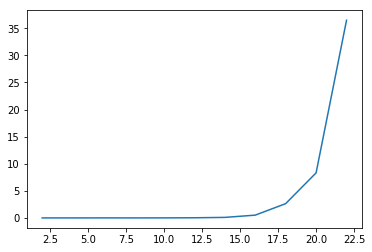

In [13]:
# Compute time for trump algorithm

x = [i for i in range(1,12)]
y = []
for nb_items_per_agent in x:
    trump_time = compute_time(nb_items_per_agent, 'trump')
    print("compute time for trump with ", nb_items_per_agent * 2, "items is", trump_time ,"seconds")
    y.append(trump_time)
    
plt.plot([2 * nb_items_per_agent for nb_items_per_agent in x],y)
plt.show()

**Pour le TrumpAlgorithm, l'algorithme parvient à retourner des allocations en moins de 10 seconde jusqu'à N=20 items**. L'hypothèse que nous avions donc formulé en début de notebook est donc vérifié.

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: BottomUpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Eve', 'Alice']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_2
|
| [2] Agents :
|	1 : Agent Eve
|		 Items : set()
|		 Utility : 0
|		 Rankings : purse > shirt
|	2 : Agent Alice
|		 Items : set()
|		 Utility : 0
|		 Rankings : purse > shirt
|
| [2] Items :
|	1 : shirt
|	2 : purse
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ START ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

----- Round 1-----
Remaining sequence ['Alice']
... Considering agent : Eve
... Least valued item : shirt
... Agent valuing this item the most : Eve
... Giving item shirt to Eve
----- Round 2-----
Remaining sequence []
... Considering agent : Alice
... Least valued item : purse
... Agent valuing this item the most : Alice
... Giving item purse t

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: BottomUpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Lucienne', 'Gauthie', 'Lucienne', 'Gauthie', 'Lucienne', 'Gauthie', 'Lucienne', 'Gauthie', 'Lucienne', 'Gauthie', 'Lucienne', 'Gauthie', 'Lucienne', 'Gauthie', 'Lucienne', 'Gauthie']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_16
|
| [2] Agents :
|	1 : Agent Gauthie
|		 Items : set()
|		 Utility : 0
|		 Rankings : plate > tv > stop sign > toilet > phone > bow > conditioner > mop > sailboat > doll > blanket > food > spring > sharpie > chapter book > boom box
|	2 : Agent Lucienne
|		 Items : set()
|		 Utility : 0
|		 Rankings : conditioner > toilet > stop sign > blanket > food > tv > sailboat > mop > boom box > chapter book > phone > bow > doll > plate > sharpie > spring
|
| [16] Items :
|	1 : toilet
|	2 : stop sign
|	3 : mop
|	4 : chapter book
|	5 : blanket
|	6 : sailboat
|	7 : phone
|	8 : spring
|	9 : boom box
|	10 

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: BottomUpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette', 'Anastasie', 'Claudette']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_20
|
| [2] Agents :
|	1 : Agent Anastasie
|		 Items : set()
|		 Utility : 0
|		 Rankings : boom box > soap > bracelet > doll > car > bow > clothes > apple > checkbook > drawer > ring > food > grid paper > cork > button > glow stick > clock > balloon > money > purse
|	2 : Agent Claudette
|		 Items : set()
|		 Utility : 0
|		 Rankings : checkbook > ring > purse > soap > glow stick > food > apple > balloon > bracelet > money > bow > car > clothes > doll > grid paper > button > boom box > clock > cork > drawer
|
| [20] Ite

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: BottomUpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice', 'Annette', 'Alice']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_22
|
| [2] Agents :
|	1 : Agent Annette
|		 Items : set()
|		 Utility : 0
|		 Rankings : food > carrots > USB drive > sketch pad > mirror > pillow > cork > window > soap > hanger > shampoo > drill press > tv > rubber ban > blouse > chapter book > ring > tissue box > apple > teddies > plate > mop
|	2 : Agent Alice
|		 Items : set()
|		 Utility : 0
|		 Rankings : drill press > carrots > shampoo > cork > USB drive > apple > rubber ban > plate > mirror > ring > window > blouse > tissue box > sketch pad > teddies > food > tv > mop > pillow > soap > hanger > chapt

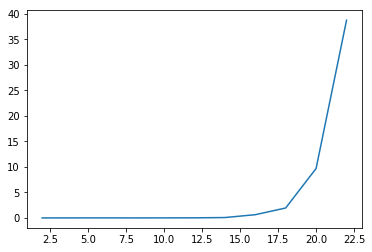

In [14]:
# Compute time for BottomUp algorithm

x = [i for i in range(1,12)]
y = []
for nb_items_per_agent in x:
    bottom_up_time = compute_time(nb_items_per_agent, 'bottom_up')
    print("compute time for bottom up with ", nb_items_per_agent * 2, "items is", bottom_up_time ,"seconds")
    y.append(bottom_up_time)
    
plt.plot([2 * nb_items_per_agent for nb_items_per_agent in x],y)
plt.show()

**Pour le BottomUpAlgorithm, l'algorithme parvient également à retourner des allocations en moins de 10 seconde jusqu'à N=20 items.**

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: OriginalSequentialAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Edwige', 'Eve']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_2
|
| [2] Agents :
|	1 : Agent Edwige
|		 Items : set()
|		 Utility : 0
|		 Rankings : hanger > bowl
|	2 : Agent Eve
|		 Items : set()
|		 Utility : 0
|		 Rankings : hanger > bowl
|
| [2] Items :
|	1 : hanger
|	2 : bowl
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ START ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

... Considering l = 1
... No such pair exist!
... Considering l = 2
Success because U was empty at the end
An allocation (Z_A, Z_B) has been found
Success because U was empty at the end
An allocation (Z_A, Z_B) has been found

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ END ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: OriginalSequentialAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Bob', 'Francois', 'Bob', 'Francois', 'Bob', 'Francois', 'Bob', 'Francois', 'Bob', 'Francois', 'Bob', 'Francois', 'Bob', 'Francois', 'Bob', 'Francois']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_16
|
| [2] Agents :
|	1 : Agent Bob
|		 Items : set()
|		 Utility : 0
|		 Rankings : shoes > car > phone > shirt > blouse > monitor > cork > face wash > stockings > shoe lace > button > bow > rug > tv > rusty nail > seat belt
|	2 : Agent Francois
|		 Items : set()
|		 Utility : 0
|		 Rankings : bow > shoe lace > monitor > tv > phone > stockings > cork > rusty nail > blouse > shirt > shoes > button > rug > car > seat belt > face wash
|
| [16] Items :
|	1 : shirt
|	2 : face wash
|	3 : button
|	4 : seat belt
|	5 : rug
|	6 : car
|	7 : stockings
|	8 : shoes
|	9 : monitor
|	10 : phone
|	11 : rusty nail
|	12 : cork
|	13 :

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: OriginalSequentialAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne', 'Francois', 'Evelyne']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_2_Items_20
|
| [2] Agents :
|	1 : Agent Evelyne
|		 Items : set()
|		 Utility : 0
|		 Rankings : computer > doll > socks > drill press > sailboat > towel > plate > stockings > clay pot > balloon > coasters > seat belt > vase > shoe lace > glow stick > button > mirror > clothes > phone > toilet
|	2 : Agent Francois
|		 Items : set()
|		 Utility : 0
|		 Rankings : mirror > vase > socks > sailboat > towel > glow stick > computer > coasters > stockings > plate > button > clay pot > seat belt > drill press > phone > toilet > doll > shoe lace > clothes

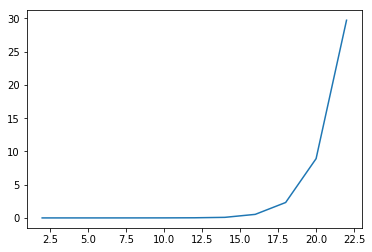

In [15]:
# Compute time for BottomUp algorithm

x = [i for i in range(1,12)]
y = []
for nb_items_per_agent in x:
    original_sa_time = compute_time(nb_items_per_agent, 'original_sa')
    print("compute time for original SA with ", nb_items_per_agent * 2, "items is", original_sa_time ,"seconds")
    y.append(original_sa_time)
    
plt.plot([2 * nb_items_per_agent for nb_items_per_agent in x],y)
plt.show()

**Pour l'algorithme Original SA, l'algorithme parvient également à retourner des allocations en moins de 10 seconde jusqu'à N=20 items.**

In [ ]:
pb_set.show_results()

Sur la figure, nous pouvons voir pour chaque algorithme testé, le pourcentage d'allocations trouvées qui vérifient chaque propriété de Borda

### Conclusion

Nous avons dans ce notebook décidé de questionner les limites posées par Marc Kilgour et Rudolf Vetschera dans _“Two-player fair division of indivisible items: Comparison
of algorithms”, European Journal of Operational Research 2018_.

Pour les trois algorithmes que nous avons étudié (`TrumpAlgorithm`, `BottomUpAlgorithm` et `OriginalSequentialAlgorithm`) le nombre d'items à partir duquel le temps d'attente devient _non raisonnable_ (ce qu'on a définit étant supérieur à 10 secondes) est toujours égale à 22.

On peut expliquer ce résultat de plusieurs façons:
- 1) nous avons choisi d'étudier 3 algorithmes simples où il y avait très peu de calculs à réaliser. Ce qui limite donc ces algorithmes est donc d'avantage un temps de parcours de l'ensemble des combinaisons d'items, qui est le même pour tous les algorithmes
- 2) le temps de calcul est de toute façon peu sensible au choix précis de l'algorithme, et nos trois algorithmes (Trump, BottomUp et Original SA) sont juste des cas particuliers

L'hypothèse 1) semble plus probable.

Finalement, pour affiner la discussion, **il faudrait moyenner les temps obtenus ci-dessus sur un grand nombre d'instances (par exemple 100) pour vérifier la robustesse face à différentes séquences, et il faudrait aussi regarder afficher les scores de Borda obtenus.**